In [1]:
from IPython.display import Markdown, display
display(Markdown("header-project.md"))

header-project.md

## **[GROUP WORK] Projet step 01: descriptive stats and data cleaning**

In order to prepare the data science project that will need to complete, gather in project group and answer the following questions:

The project will use the `california_houses.csv`.
In this dataset, **each row of the dataset represents one district in California**.


 - Load the dataset
 - For **each** column, print out descriptive statistics (including distributions, etc.) that you find relevant to get to know the data
 - Identify and fix issues in the dataset (spoiler alert: there are many!)
 - Create a categorical  variable \<Closest_city> indicating the closest CA city and drop the distance to each city (not needed)
 - Describe **each** column with a descriptive sentence
 - Save your clean dataset as a csv file
 - Using a library such as `geopandas` or `plotly`, plot the location of districts on a map
 - Using the function you wrote in the first two sessions, perform a descriptive analysis of each variable independently.

----

<center><h1>GROUP-09</h1></center>

### Packages

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Define a threshold for considering data points as outliers
threshold = 1.5

# Create a mask to identify outliers
outlier_mask = ((df < (Q1 - threshold * IQR)) | (df > (Q3 + threshold * IQR))).any(axis=1)

# Remove outliers
df_no_outliers = df[~outlier_mask]
df_no_outliers.describe()

### Load the dataset

In [3]:
path = './Data/california_houses_mod.csv' # file's path
df = pd.read_csv(path)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20654 entries, 0 to 20653
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Median_House_Value        20654 non-null  float64
 1   Median_Income             20654 non-null  float64
 2   Median_Age                20607 non-null  float64
 3   Tot_Rooms                 20607 non-null  float64
 4   Tot_Bedrooms              20607 non-null  float64
 5   Population                20654 non-null  float64
 6   Households                20654 non-null  float64
 7   Latitude                  20654 non-null  float64
 8   Longitude                 20654 non-null  float64
 9   Distance_to_coast         20654 non-null  float64
 10  Distance_to_LA            20654 non-null  float64
 11  Distance_to_SanDiego      20654 non-null  float64
 12  Distance_to_SanJose       20654 non-null  float64
 13  Distance_to_SanFrancisco  20654 non-null  float64
 14  Tot_No

 - For **each** column, print out descriptive statistics (including distributions, etc.) that you find relevant to get to know the data

In [5]:
df.describe()

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco,Tot_No_Bedrooms,Max_Age
count,20654.000000,20654.000000,20607.000000,20607.000000,20607.000000,20654.000000,20654.000000,20654.000000,20654.000000,20654.000000,2.065400e+04,2.065400e+04,20654.000000,20654.000000,20654.000000,20654.000000
mean,206859.008521,74.185471,28.638230,2635.554472,537.748338,1425.302411,499.375666,35.631504,-119.569465,40499.168256,2.693968e+05,3.981210e+05,349205.216365,386711.388384,2097.530551,43.153239
std,115391.970967,5925.379749,12.591488,2180.774851,421.068876,1132.221567,382.344011,2.135876,2.003603,49130.495010,2.477182e+05,2.893975e+05,217173.597449,250143.860258,1796.213255,12.947424
min,14999.000000,-55.091700,1.000000,2.000000,1.000000,3.000000,-98.000000,32.540000,-124.350000,120.676447,4.205891e+02,4.849180e+02,569.448118,456.141313,0.000000,9.000000
25%,119600.000000,2.562500,18.000000,1447.500000,295.000000,787.000000,280.000000,33.930000,-121.800000,9079.756762,3.211125e+04,1.594146e+05,113072.904889,117332.993656,1126.000000,33.000000
50%,179700.000000,3.534700,29.000000,2127.000000,435.000000,1166.000000,409.000000,34.260000,-118.490000,20521.624925,1.736264e+05,2.146241e+05,459800.789707,526561.271568,1681.000000,43.000000
75%,264700.000000,4.743700,37.000000,3147.500000,647.000000,1725.000000,605.000000,37.710000,-118.010000,49824.747685,5.271382e+05,7.057935e+05,516946.490963,584562.195811,2509.000000,52.000000
max,500001.000000,584062.237200,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,41.950000,-114.310000,333804.686371,1.018260e+06,1.196919e+06,836762.678210,903627.663298,33110.000000,76.000000


In [6]:
df.head(5)

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco,Tot_No_Bedrooms,Max_Age
0,452600.0,8.3252,41.0,880.0,129.0,322.0,126.0,37.88,-122.23,9263.040773,556529.158342,735501.806984,67432.517001,21250.213767,751.0,50.0
1,358500.0,8.3014,21.0,7099.0,1106.0,2401.0,1138.0,37.86,-122.22,10225.733072,554279.850069,733236.884360,65049.908574,20880.600400,5993.0,34.0
2,352100.0,7.2574,52.0,1467.0,190.0,496.0,177.0,37.85,-122.24,8259.085109,554610.717069,733525.682937,64867.289833,18811.487450,1277.0,66.0
3,341300.0,5.6431,52.0,1274.0,235.0,558.0,219.0,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568,1039.0,63.0
4,342200.0,3.8462,52.0,1627.0,280.0,565.0,259.0,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568,1347.0,68.0


In [7]:
df.tail(5)

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco,Tot_No_Bedrooms,Max_Age
20649,113600.0,3.3162,27.0,1781.0,441.0,759.0,340.0,33.78,-116.47,106996.992219,166441.349879,134664.038941,629844.770098,697175.812031,1340.0,40.0
20650,214600.0,6.0891,5.0,1619.0,272.0,1063.0,296.0,32.91,-117.16,9823.595763,161963.442905,21601.410086,653596.100510,721610.303036,1347.0,27.0
20651,119000.0,2.5388,15.0,3273.0,895.0,1872.0,842.0,32.85,-116.93,29578.864714,180897.510000,26259.911336,672575.941687,740609.168959,2378.0,34.0
20652,225000.0,2.8798,6.0,1495.0,552.0,1087.0,557.0,37.33,-121.89,22935.306685,491108.971219,669627.294557,665.565994,68659.580549,943.0,27.0
20653,75000.0,4.0000,36.0,48.0,12.0,27.0,8.0,37.33,-121.29,68064.090985,456581.636394,635928.492033,53319.567502,112069.416753,36.0,50.0


In [8]:
df.isnull().sum()

Median_House_Value           0
Median_Income                0
Median_Age                  47
Tot_Rooms                   47
Tot_Bedrooms                47
Population                   0
Households                   0
Latitude                     0
Longitude                    0
Distance_to_coast            0
Distance_to_LA               0
Distance_to_SanDiego         0
Distance_to_SanJose          0
Distance_to_SanFrancisco     0
Tot_No_Bedrooms              0
Max_Age                      0
dtype: int64

 - Identify and fix issues in the dataset (spoiler alert: there are many!)

In [9]:
df.dropna(inplace = True)

In [10]:
df = df.loc[df['Median_Income'] >= 0]
df = df.loc[df['Households'] >= 0]

In [11]:
df.drop_duplicates(inplace = True)

 - Create a categorical  variable \<Closest_city> indicating the closest CA city and drop the distance to each city (not needed)

In [12]:
def find_nearest_destination(row):
    distances = row[['Distance_to_LA', 'Distance_to_SanDiego', 'Distance_to_SanJose', 'Distance_to_SanFrancisco']]
    nearest_destination = distances.idxmin()
    return nearest_destination

df['Closest_city'] = df.apply(find_nearest_destination, axis=1)
df['Closest_city'] = df['Closest_city'].str.replace('Distance_to_', '')

# df['Closest_city'].unique()

df.drop(columns = ['Distance_to_LA', 'Distance_to_SanDiego', 'Distance_to_SanJose', 'Distance_to_SanFrancisco'], inplace = True)

In [13]:
df.to_csv('./Data/california_houses_new.csv', index=False)

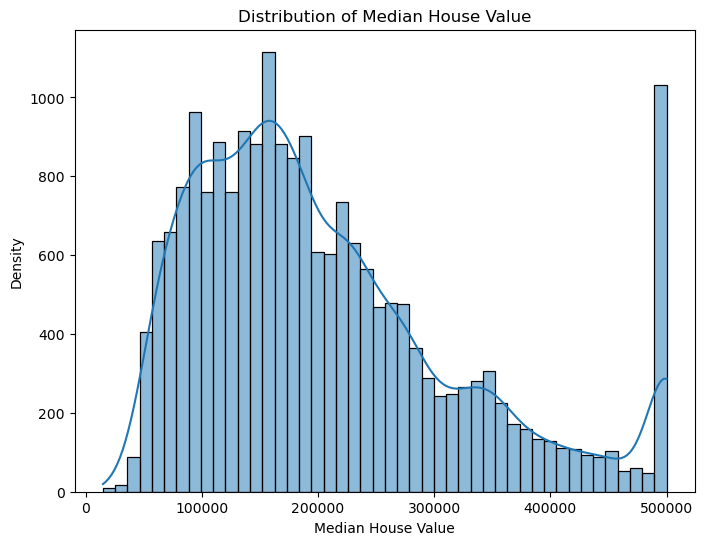

In [16]:
plt.figure(figsize=(8, 6))

sns.histplot(df['Median_House_Value'], kde=True)

"""
kde  ==  Kernel density estimation is actually a natural extension of the histogram.

First consider the concept of density function, it is natural to think that the density function is the 
first order derivative of the distribution function. So when we get some data, is it possible to estimate 
the density function by estimating the first order derivative of the distribution function? One of the simplest 
and most effective ways to estimate the distribution function is the so-called 
"empirical distribution function (empirical distribution function)"
"""

plt.title('Distribution of Median House Value')
plt.xlabel('Median House Value')
plt.ylabel('Density')

plt.show()

 - Using a library such as `geopandas` or `plotly`, plot the location of districts on a map

In [17]:
import plotly.express as px

fig = px.scatter_geo(df, 
                     lat='Latitude', 
                     lon='Longitude', 
                     scope='usa', 
                     title='Districts in California')

fig.show()
